<a href="https://colab.research.google.com/github/pateljay7018/CE888-7-SP-D.S.-and-decision-making-/blob/main/Lab-3/bank_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import f1_score

df=pd.read_csv("https://raw.githubusercontent.com/pateljay7018/CE888-7-SP-D.S.-and-decision-making-/main/Lab-3/bank-additional-full.csv", delimiter = ";")
# Uploaded the file to session storage. Not fetching using the http link.
df.head()
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
#Task 1 and 3 : Use LabelEncoder to convert the label into numbers. & Column "duration" must be deleted.
feature = df.drop(['y','duration'], axis=1)
for column in feature.columns:
  if feature[column].dtypes == type(object):
    le = LabelEncoder()
    feature[column] = le.fit_transform(feature[column])
feature.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,1,0,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
1,57,7,1,3,1,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37,7,1,3,0,2,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
3,40,0,1,1,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
4,56,7,1,3,0,0,2,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0


In [ ]:
#Tasl 4 : Check if there are any missing values in the dataset. If there are, drop the rows. 
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

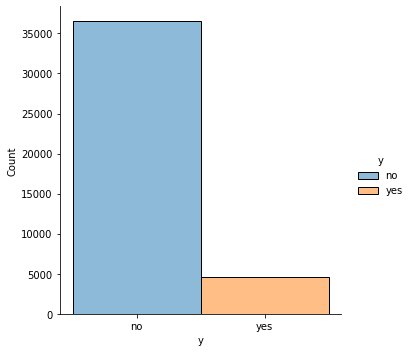

In [ ]:
# Task 5 : Plot histogram of the label and calculate the imbalance in the dataset.
#Visualize propotion of label that are imbalance. 
sns_plot = sns.displot(x=df['y'], data=df, hue="y")

In [ ]:

#Applied LabelEncoder to covert non-numeric data to numerical data
df[['y']] = df[['y']].apply(LabelEncoder().fit_transform)
label = df['y']

 Model the data:

In [ ]:
#Task 1 : Using the train_test_split function in scikit-learn, separate your dataset into a training and a test set, with a test size of 20% and random_state=50. Make sure the train/test split is stratified (and check that it is!). Stratified means that the percentages of classes in each fold remains constant.
#divided dataset to 80 percent training and 20 percent  for test 
x_train,x_test,y_train,y_test = train_test_split(feature,label,
                                                 test_size=0.2,
                                                 random_state=50,
                                                 stratify=label)

In [ ]:
#Task 2 : Report the results of 10-fold stratified cross-validation on the training set using a random forest classifier with 100 trees and depth=3. Ensure you're using an appropriate metric (Use sorted(sklearn.metrics.SCORERS.keys()) to see what are the valid options).
kf = StratifiedKFold(n_splits=10)

In [ ]:

for i in range(len(score)) :
  print('Fold',i+1,' ', score[i])
  
print('Average', score.mean())

Fold 1   0.25162689804772237
Fold 2   0.30303030303030304
Fold 3   0.23946784922394682
Fold 4   0.2875816993464052
Fold 5   0.24070021881838072
Fold 6   0.29257641921397376
Fold 7   0.3744855967078189
Fold 8   0.2576419213973799
Fold 9   0.27074235807860264
Fold 10   0.2771855010660981
Average 0.2795038764930632


In [ ]:

#Create RandomForest model with 100 trees and depth = 3 and evaluate by use F1 score
clf = RandomForestClassifier(n_estimators=100,max_depth=3)
score = cross_val_score(clf,x_train,y_train, cv = kf, scoring='f1')

In [ ]:
#Create RandomForest model with 150 trees and depth = 6 and evaluate by use F1 score
clf2 = RandomForestClassifier(n_estimators=150,max_depth=6, random_state=60)
score2 = cross_val_score(clf2,x_train,y_train, cv = kf, scoring='f1')
print('Average', score2.mean())

Average 0.3050884934171324


In [ ]:

#Create RandomForest model with 1000 trees and depth = 8 and evaluate by use F1 score
clf3 = RandomForestClassifier(n_estimators=1000,max_depth=8, random_state=60)
clf3.fit(x_train,y_train)
score3 = cross_val_score(clf3,x_train,y_train, cv = kf, scoring='f1')
print('Average', score3.mean())

Average 0.3305730580476827


In [41]:

#Create RandomForest model with 750 trees and depth = 6 and evaluate by use F1 score
clf4 = RandomForestClassifier(n_estimators=750,max_depth=6, random_state=60)
clf4.fit(x_train,y_train)

score4 = cross_val_score(clf4,x_train,y_train, cv = kf, scoring='f1')
print('Average', score4.mean())

Average 0.2991679130485785


In [ ]:
#Task 3 : Compare the results of your classifier with that of a dummy classifier.
dummy_clf = DummyClassifier(strategy='stratified')
dummy_clf.fit(x_train, y_train)
score_dummy = cross_val_score(dummy_clf,x_train,y_train, cv = kf, scoring='f1')
print('Average', score_dummy.mean())

Average 0.11557592590306076


In [ ]:
param_grid = { 
    'n_estimators': [100, 500,1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [3,6,9],
    'criterion' :['gini', 'entropy']
}

In [ ]:
#Task 4: Use GridSearchCV to find a better set of parameters for your random forest.
CV_clf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv= 10, scoring='f1')
#Train with new parameter
CV_clf.fit(x_train,y_train)
CV_clf.best_params_

In [42]:
#Task 5:Print the cross-validation metric (whichever you previously chose) that you obtain for the random forest for the best parameters found with GridSearchCV
features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']

#Find the important of features
importances = clf4.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf4.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print(indices)

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]],  importances[indices[f]]))

[18 17 11 13 14 16 15  8  0 12  7  9 10  3  1  4  2  5  6]
Feature ranking:
1. nr.employed (0.241276)
2. euribor3m (0.185985)
3. pdays (0.127250)
4. poutcome (0.103808)
5. emp.var.rate (0.079133)
6. cons.conf.idx (0.075059)
7. cons.price.idx (0.055928)
8. month (0.038261)
9. age (0.023078)
10. previous (0.016197)
11. contact (0.014052)
12. day_of_week (0.010818)
13. campaign (0.006765)
14. education (0.006672)
15. job (0.005804)
16. default (0.003454)
17. marital (0.003086)
18. housing (0.001789)
19. loan (0.001587)


In [ ]:
#task 6 : Report the generalisation error (still using the same metric) on your test set.
#Predict test data set and evaluate with F1-score
y_pred = clf3.predict(x_test)
f1_score(y_test,y_pred)